## Plotting Voronoi diagrams

This implementation uses Scikit-learn to build a 1-nearest neighbour model that, given a 2D space with N points, decomposes the space into N regions based on proximity to each point.

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from utils import extract_plot_ranges, generate_grid_points

%config InlineBackend.figure_format = "retina"

# set seaborn aesthetics
sns.set_context("talk")
sns.set_style("white")

# set colormap
CMAP = "tab10"

# set random seed
seed = 10
np.random.seed(seed)

In [2]:
# 1. generate N points, each belonging to a different class
N = 100
X, y = make_blobs(n_samples=N, centers=N, n_features=2, 
                  cluster_std=3.0, random_state=seed)

print("X:", X.shape)
print("y:", y.shape)

X: (100, 2)
y: (100,)


In [3]:
# 2. fit 1-nearest neighbour model
voronoi = KNeighborsClassifier(n_neighbors=1)
voronoi = voronoi.fit(X, y)

In [4]:
# 3. generate 2D grid of 100 x 100 = 10k points
min_x1, max_x1, min_x2, max_x2 = extract_plot_ranges(X)
grid_points = generate_grid_points(min_x1, max_x1, min_x2, max_x2)
print("Grid points: {}".format(grid_points.shape))

Grid points: (10000, 2)


In [5]:
# get model's predictions for grid
grid_predictions = voronoi.predict(grid_points)
print("grid_predictions:", grid_predictions.shape)

grid_predictions: (10000,)


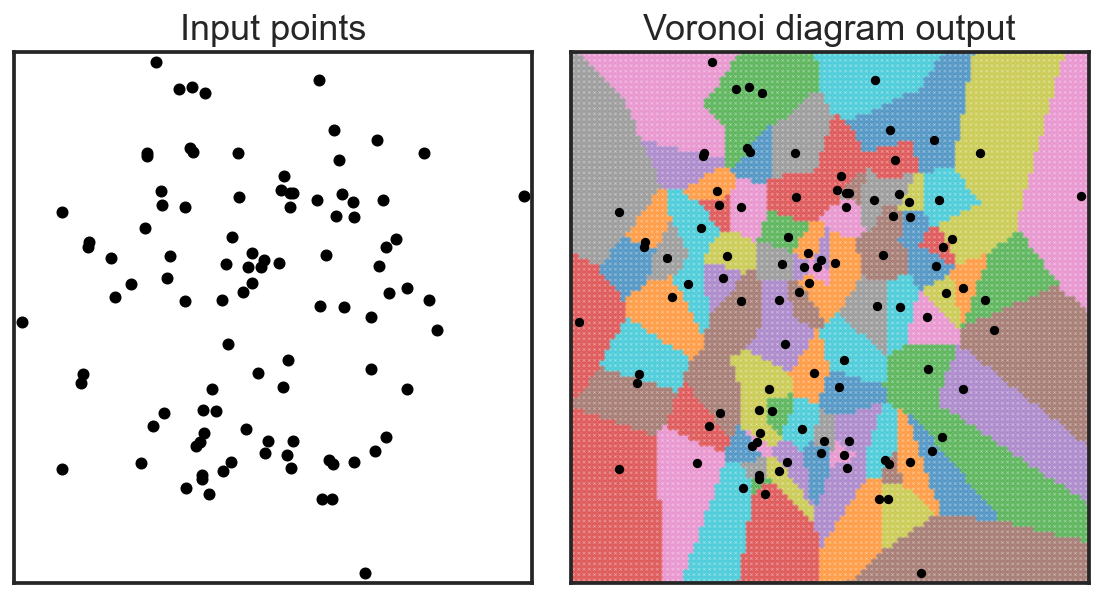

In [6]:
# plot Voronoi diagram
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5))

# plot input points
axes[0].scatter(X[:, 0], X[:, 1], c="black", marker=".")
axes[0].set_title("Input points")

# plot Voronoi tessellation
axes[1].scatter(grid_points[:, 0], grid_points[:, 1], 
                c=grid_predictions, cmap=CMAP, alpha=0.5, s=4)
axes[1].scatter(X[:, 0], X[:, 1], c="black", marker=".", s=40)
axes[1].set_title("Voronoi diagram output")

# set axis parameters
for ax in axes:
    ax.set_xlim([min_x1, max_x1])
    ax.set_ylim([min_x2, max_x2])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.show()